## **Natural Language Processing with Keras**

This example assumes that you have a good understanding of the concepts of natural language processing, text processing, Recurrent Neural Networks (RNNs), and Long Short-Term Memory (LSTMs). 

If you would like to refresh upon these topics, please try the following links:

- [Awesome article on RNNs and LSTMs](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

- [Word Embeddings explained](https://dzone.com/articles/word-embedding-word2vec-explained)


#### Lets first check out the most basic layers used to build RNNs and LSTMs

[Keras Recurrent Layers API](https://keras.io/api/layers/recurrent_layers/)

[Keras Embedding Layer](https://keras.io/api/layers/core_layers/embedding/)

[Keras Text Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

[Keras Text Preprocessing](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text)

#### **Before starting developing the model, lets first explore the built-in imdb dataset. Later we will import the dataset from external source and process it from scratch**

[Lets check out the dataset here](https://keras.io/api/datasets/imdb/)

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [ ]:
dir(imdb)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'get_word_index',
 'load_data']

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [ ]:
print(len(x_train[0]))

218


In [ ]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print(y_train[0])

1


In [ ]:
## lets check the unique label values
set(y_train) ## it should return classes for positive (=0) and negative (=1)

{0, 1}

In [ ]:
## lets count the unique words in the training dataset
len(np.unique(np.hstack(x_train)))

88585

In [ ]:
## lets count the unique words in the test dataset
len(np.unique(np.hstack(x_test)))

51725

In [ ]:
## lets check out the word index from the dataset
indices = imdb.get_word_index()
indices

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

### **Lets work with the raw dataset**
This should help us get a better understanding of processing text data

[Dataset Link](https://raw.githubusercontent.com/sidd-hart/keras-g/master/imdb_reviews.csv)

In [ ]:
import pandas as pd

In [ ]:
reviews = pd.read_csv("https://raw.githubusercontent.com/sidd-hart/keras-g/master/imdb_reviews.csv")

In [ ]:
reviews.shape

(50000, 2)

In [ ]:
reviews.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [ ]:
reviews['review'][0]

'My family and I normally do not watch local movies for the simple reason that they are poorly made, they lack the depth, and just not worth our time.<br /><br />The trailer of "Nasaan ka man" caught my attention, my daughter in law\'s and daughter\'s so we took time out to watch it this afternoon. The movie exceeded our expectations. The cinematography was very good, the story beautiful and the acting awesome. Jericho Rosales was really very good, so\'s Claudine Barretto. The fact that I despised Diether Ocampo proves he was effective at his role. I have never been this touched, moved and affected by a local movie before. Imagine a cynic like me dabbing my eyes at the end of the movie? Congratulations to Star Cinema!! Way to go, Jericho and Claudine!!'

In [ ]:
## check unique labels
reviews['sentiment'].unique() ## 0 == positive and 1 == negative

array([1, 0])

In [ ]:
## lets check how many negative and positive reviews we have here
len(reviews[reviews['sentiment'] == 1])

25000

In [ ]:
len(reviews[reviews['sentiment'] == 1]) == len(reviews[reviews['sentiment'] == 0])

True

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


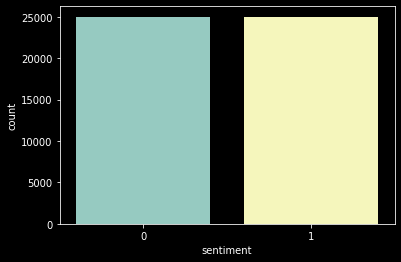

In [ ]:
## we can do it graphically too
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')

sns.countplot(x='sentiment', data=reviews);

In [ ]:
## lets take a look at the preprocessing involved on one sample
sample = reviews['review'][0]
sample

'My family and I normally do not watch local movies for the simple reason that they are poorly made, they lack the depth, and just not worth our time.<br /><br />The trailer of "Nasaan ka man" caught my attention, my daughter in law\'s and daughter\'s so we took time out to watch it this afternoon. The movie exceeded our expectations. The cinematography was very good, the story beautiful and the acting awesome. Jericho Rosales was really very good, so\'s Claudine Barretto. The fact that I despised Diether Ocampo proves he was effective at his role. I have never been this touched, moved and affected by a local movie before. Imagine a cynic like me dabbing my eyes at the end of the movie? Congratulations to Star Cinema!! Way to go, Jericho and Claudine!!'

#### Step 1 - Get rid of the HTML tags
There are several ways to do this, some most popular ways involve using regular-expression [Read more here](https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python)

We will use the beautiful soup's html parser instead

In [ ]:
## lets first get rid of the html tags
from bs4 import BeautifulSoup

def remove_tags(text):
  html = BeautifulSoup(text)
  return html.text

sample_no_tags = remove_tags(sample)
sample_no_tags

'My family and I normally do not watch local movies for the simple reason that they are poorly made, they lack the depth, and just not worth our time.The trailer of "Nasaan ka man" caught my attention, my daughter in law\'s and daughter\'s so we took time out to watch it this afternoon. The movie exceeded our expectations. The cinematography was very good, the story beautiful and the acting awesome. Jericho Rosales was really very good, so\'s Claudine Barretto. The fact that I despised Diether Ocampo proves he was effective at his role. I have never been this touched, moved and affected by a local movie before. Imagine a cynic like me dabbing my eyes at the end of the movie? Congratulations to Star Cinema!! Way to go, Jericho and Claudine!!'

#### Step 2 - Get rid of the punctuations
We will use the regular expressions for this one. Again, there are several ways for example Python's string library

In [ ]:
import re

def remove_punctuations(text):
  return re.sub('[^a-zA-Z]', ' ', text)

sample_no_punc = remove_punctuations(sample_no_tags)
sample_no_punc

'My family and I normally do not watch local movies for the simple reason that they are poorly made  they lack the depth  and just not worth our time The trailer of  Nasaan ka man  caught my attention  my daughter in law s and daughter s so we took time out to watch it this afternoon  The movie exceeded our expectations  The cinematography was very good  the story beautiful and the acting awesome  Jericho Rosales was really very good  so s Claudine Barretto  The fact that I despised Diether Ocampo proves he was effective at his role  I have never been this touched  moved and affected by a local movie before  Imagine a cynic like me dabbing my eyes at the end of the movie  Congratulations to Star Cinema   Way to go  Jericho and Claudine  '

#### Step 3 - Drop the multiple white spaces

In [ ]:
def remove_spaces(text):
  return re.sub(r'\s+', ' ', text)

sample_no_spaces = remove_spaces(sample_no_punc)
sample_no_spaces

'My family and I normally do not watch local movies for the simple reason that they are poorly made they lack the depth and just not worth our time The trailer of Nasaan ka man caught my attention my daughter in law s and daughter s so we took time out to watch it this afternoon The movie exceeded our expectations The cinematography was very good the story beautiful and the acting awesome Jericho Rosales was really very good so s Claudine Barretto The fact that I despised Diether Ocampo proves he was effective at his role I have never been this touched moved and affected by a local movie before Imagine a cynic like me dabbing my eyes at the end of the movie Congratulations to Star Cinema Way to go Jericho and Claudine '

#### Step 4 - Drop the single characters

In [ ]:
def remove_singles(text):
  return re.sub(r'\b[^a-zA-Z]\b', '', text)

sample_clean = remove_singles(sample_no_spaces)
sample_clean

'My family and I normally do not watch local movies for the simple reason that they are poorly made they lack the depth and just not worth our time The trailer of Nasaan ka man caught my attention my daughter in law s and daughter s so we took time out to watch it this afternoon The movie exceeded our expectations The cinematography was very good the story beautiful and the acting awesome Jericho Rosales was really very good so s Claudine Barretto The fact that I despised Diether Ocampo proves he was effective at his role I have never been this touched moved and affected by a local movie before Imagine a cynic like me dabbing my eyes at the end of the movie Congratulations to Star Cinema Way to go Jericho and Claudine '

#### Lets put all above steps in one function

In [ ]:
def clean_text(text):
  text = remove_tags(text)
  text = remove_punctuations(text)
  text = remove_singles(text)
  text = remove_spaces(text)
  return text

In [ ]:
sample_clean2 = clean_text(sample)
sample_clean2

'My family and I normally do not watch local movies for the simple reason that they are poorly made they lack the depth and just not worth our time The trailer of Nasaan ka man caught my attention my daughter in law s and daughter s so we took time out to watch it this afternoon The movie exceeded our expectations The cinematography was very good the story beautiful and the acting awesome Jericho Rosales was really very good so s Claudine Barretto The fact that I despised Diether Ocampo proves he was effective at his role I have never been this touched moved and affected by a local movie before Imagine a cynic like me dabbing my eyes at the end of the movie Congratulations to Star Cinema Way to go Jericho and Claudine '

#### Lets apply this to all the reviews

In [ ]:
clean_reviews = reviews['review'].apply(func=clean_text)
clean_reviews.head()

0    My family and I normally do not watch local mo...
1    Believe it or not this was at one time the wor...
2    After some internet surfing I found the Homefr...
3    One of the most unheralded great works of anim...
4    It was the Sixties and anyone with long hair a...
Name: review, dtype: object

In [ ]:
clean_reviews[5]

'For my humanities quarter project for school i chose to do human trafficking After some research on the internet i found this DVD and ordered it I just finished watching it and I am still thinking about it All I can say is Wow It is such a compelling story of a year old Vietnamese girl named Holly and an American man named Patric who tries to save her The ending leaves you breathless and although it s not a happily ever after ending it is very realistic It is amazing and I recommend it to anyone You really connect with Holly and Patric and your heart breaks for her and because of what happens to her I loved it so much and now I want to know what happens next '

## Lets get our sentiment labels as well

In [ ]:
labels = reviews['sentiment']

In [ ]:
labels.unique(), labels.dtype

(array([1, 0]), dtype('int64'))

### Prepare training and testing splits

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(clean_reviews, labels, test_size=0.25, random_state=10)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37500,), (12500,), (37500,), (12500,))

### Tokenize the data

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenize = Tokenizer(num_words=10000)

In [ ]:
dir(tokenize)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 'char_level',
 'document_count',
 'filters',
 'fit_on_sequences',
 'fit_on_texts',
 'get_config',
 'index_docs',
 'index_word',
 'lower',
 'num_words',
 'oov_token',
 'sequences_to_matrix',
 'sequences_to_texts',
 'sequences_to_texts_generator',
 'split',
 'texts_to_matrix',
 'texts_to_sequences',
 'texts_to_sequences_generator',
 'to_json',
 'word_counts',
 'word_docs',
 'word_index']

In [ ]:
tokenize.fit_on_texts(x_train)

x_train = tokenize.texts_to_sequences(x_train)
x_test = tokenize.texts_to_sequences(x_test)

In [ ]:
print(tokenize.word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'it': 7, 'in': 8, 'i': 9, 'this': 10, 'that': 11, 's': 12, 'was': 13, 'as': 14, 'movie': 15, 'with': 16, 'for': 17, 'but': 18, 'film': 19, 'you': 20, 't': 21, 'on': 22, 'not': 23, 'he': 24, 'are': 25, 'his': 26, 'have': 27, 'one': 28, 'be': 29, 'all': 30, 'at': 31, 'they': 32, 'by': 33, 'an': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'there': 39, 'or': 40, 'just': 41, 'her': 42, 'about': 43, 'out': 44, 'if': 45, 'has': 46, 'what': 47, 'some': 48, 'good': 49, 'can': 50, 'when': 51, 'more': 52, 'very': 53, 'she': 54, 'up': 55, 'no': 56, 'time': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'story': 62, 'only': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'me': 68, 'we': 69, 'well': 70, 'were': 71, 'than': 72, 'much': 73, 'bad': 74, 'been': 75, 'get': 76, 'do': 77, 'other': 78, 'will': 79, 'great': 80, 'people': 81, 'also': 82, 'into': 83, 'because': 84, 'how': 85, 'him': 86, 'don': 87, 'first': 88, 'most': 89, '

In [ ]:
tokenize.sequences_to_texts([x_train[0]])

['the premise is rather original and well thought of but unfortunately a good story is very low budget that doesn t even allow for decent special effects jeff does his best amongst a poor cast as does the always beautiful linda hoffman they should make more movies together the movie while not worth much praise at least one viewing']

### **Padding**

We apply padding to make sure all the text input sequences are of the same length. So basically, longer than desired sequences will be truncated and shorter sequences will be padded with 0s

[Read More Here](https://medium.com/@canerkilinc/padding-for-nlp-7dd8598c916a#:~:text=In%20other%20words%2C%20naturally%2C%20some,where%20the%20padding%20is%20necessary.&text=When%20a%20sentence%20exceeds%20the,the%20beginning%20of%20the%20sentence.)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
## lets check length first
for i in x_train[:10]:
  print(len(i))

59
151
250
184
181
165
142
211
564
121


In [ ]:
## lets keep the maximum length of sequences to 150
pad_length = 150

SIZE = len(tokenize.word_index) + 1 ## add 1 to make up for reserved 0 index for unknown words
print(SIZE)

x_train = pad_sequences(x_train, padding='post', maxlen=pad_length)
x_test = pad_sequences(x_test, padding='post', maxlen=pad_length)

90066


In [ ]:
## lets check length again
for i in x_train[:10]:
  print(len(i))

150
150
150
150
150
150
150
150
150
150


### Word Embeddings

[GloVe official page](https://nlp.stanford.edu/projects/glove/)

[GloVe GitHub page](https://github.com/stanfordnlp/GloVe)

[Keras GloVe Example](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html)

[Kaggle GloVe files](https://www.kaggle.com/anindya2906/glove6b?select=glove.6B.100d.txt)

[FloydHub glove.6B.100d.txt](https://www.floydhub.com/mhavelant/datasets/glove6b/1/glove.6B.100d.txt)

[FloydHub GloVe Page](https://www.floydhub.com/mhavelant/datasets/glove6b)

====IMPORTANT====
**IN CASE THE ABOVE LINKS DONT WORK. TRY THE FOLLOWING COMMAND**
>!wget -N --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qexh7krbNG0Teu1AIYMjhZGud-oVh8gU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qexh7krbNG0Teu1AIYMjhZGud-oVh8gU" -O glove.6B.100d.txt && rm -rf /tmp/cookies.txt

In [ ]:
## Lets start with getting the GloVe 100d file
!wget -N http://nlp.stanford.edu/data/glove.6B.zip

--2020-07-03 10:05:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-07-03 10:05:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-07-03 10:05:35--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘glove.6B.zip’ not modified on server. Omitting download.



In [ ]:
!unzip -n glove.6B.zip

Archive:  glove.6B.zip


In [ ]:
!ls

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data


In [ ]:
## lets explore the vector file
glove = pd.read_csv('glove.6B.100d.txt', sep=" ", quoting=3, header=None, index_col=0)

In [ ]:
glove.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
the,-0.038194,-0.244870,0.728120,-0.399610,0.083172,0.043953,-0.391410,0.334400,-0.575450,0.087459,0.287870,-0.067310,0.309060,-0.263840,-0.13231,-0.207570,0.33395,-0.338480,-0.317430,-0.483360,0.146400,-0.373040,0.34577,0.052041,0.449460,-0.469710,0.026280,-0.54155,-0.155180,-0.141070,-0.039722,0.28277,0.143930,0.234640,-0.31021,0.086173,0.20397,0.52624,0.171640,-0.082378,...,-0.249780,0.92136,0.034514,0.467450,1.10790,-0.193580,-0.074575,0.233530,-0.052062,-0.220440,0.057162,-0.158060,-0.307980,-0.416250,0.379720,0.150060,-0.532120,-0.205500,-1.25260,0.071624,0.70565,0.497440,-0.42063,0.261480,-1.53800,-0.302230,-0.073438,-0.283120,0.371040,-0.25217,0.016215,-0.017099,-0.389840,0.874240,-0.725690,-0.510580,-0.520280,-0.145900,0.827800,0.270620
",",-0.107670,0.110530,0.598120,-0.543610,0.673960,0.106630,0.038867,0.354810,0.063510,-0.094189,0.157860,-0.816650,0.141720,0.219390,0.58505,-0.521580,0.22783,-0.166420,-0.682280,0.358700,0.425680,0.190210,0.91963,0.575550,0.461850,0.423630,-0.095399,-0.42749,-0.165670,-0.056842,-0.295950,0.26037,-0.266060,-0.070404,-0.27662,0.158210,0.69825,0.43081,0.279520,-0.454370,...,-0.220800,0.18669,0.131770,0.151170,0.71310,-0.352150,0.913480,0.617830,0.709920,0.239550,-0.145710,-0.378590,-0.045959,-0.473680,0.238500,0.205360,-0.189960,0.325070,-1.11120,-0.363410,0.98679,-0.084776,-0.54008,0.117260,-1.01940,-0.244240,0.127710,0.013884,0.080374,-0.35414,0.349510,-0.722600,0.375490,0.444100,-0.990590,0.612140,-0.351110,-0.831550,0.452930,0.082577
.,-0.339790,0.209410,0.463480,-0.647920,-0.383770,0.038034,0.171270,0.159780,0.466190,-0.019169,0.414790,-0.343490,0.268720,0.044640,0.42131,-0.410320,0.15459,0.022239,-0.646530,0.252560,0.043136,-0.194450,0.46516,0.456510,0.685880,0.091295,0.218750,-0.70351,0.167850,-0.350790,-0.126340,0.66384,-0.258200,0.036542,-0.13605,0.402530,0.14289,0.38132,-0.122830,-0.458860,...,-0.552620,0.65000,0.086426,0.390120,1.06320,-0.353790,0.483280,0.346000,0.841740,0.098707,-0.242130,-0.270530,0.045287,-0.401470,0.113950,0.006223,0.036673,0.018518,-1.02130,-0.208060,0.64072,-0.068763,-0.58635,0.334760,-1.14320,-0.114800,-0.250910,-0.459070,-0.096819,-0.17946,-0.063351,-0.674120,-0.068895,0.536040,-0.877730,0.318020,-0.392420,-0.233940,0.472980,-0.028803
of,-0.152900,-0.242790,0.898370,0.169960,0.535160,0.487840,-0.588260,-0.179820,-1.358100,0.425410,0.153770,0.242150,0.134740,0.411930,0.67043,-0.564180,0.42985,-0.012183,-0.116770,0.317810,0.054177,-0.054273,0.35516,-0.302410,0.314340,-0.338460,0.717150,-0.26855,-0.158370,-0.474670,0.051581,-0.33252,0.150030,-0.129900,-0.54617,-0.378430,0.64261,0.82187,-0.080006,0.078479,...,0.048850,0.78267,0.384970,0.420970,0.67882,0.103370,0.632800,-0.026595,0.586470,-0.443320,0.330570,-0.120220,-0.556450,0.073611,0.209150,0.433950,-0.012761,0.089874,-1.79910,0.084808,0.77112,0.631050,-0.90685,0.603260,-1.75150,0.185960,-0.506870,-0.702030,0.665780,-0.81304,0.187120,-0.018488,-0.267570,0.727000,-0.593630,-0.348390,-0.560940,-0.591000,1.003900,0.206640
to,-0.189700,0.050024,0.190840,-0.049184,-0.089737,0.210060,-0.549520,0.098377,-0.201350,0.342410,-0.092677,0.161000,-0.132680,-0.281600,0.18737,-0.429590,0.96039,0.139720,-1.078100,0.405180,0.505390,-0.550640,0.48440,0.380440,-0.002906,-0.349420,-0.099696,-0.78368,1.036300,-0.231400,-0.471210,0.57126,-0.214540,0.359580,-0.48319,1.087500,0.28524,0.12447,-0.039248,-0.076732,...,-0.347800,0.51621,-0.433870,0.368520,0.74573,0.072102,0.279310,0.925690,-0.050336,-0.858560,-0.135800,-0.925510,-0.339910,-1.039400,-0.067203,-0.213790,-0.476900,0.213770,-0.84008,0.052536,0.59298,0.296040,-0.67644,0.139160,-1.55040,-0.207650,0.722200,0.520560,-0.076221,-0.15194,-0.131340,0.058617,-0

In [ ]:
print(glove.index.values.take(list(range(0, 100, 10))))
print(glove.index.values[:10])

['the' 'for' 'it' 'be' 'had' 'new' 'up' "n't" '$' 'president']
['the' ',' '.' 'of' 'to' 'and' 'in' 'a' '"' "'s"]


###### Lets make the embeddings matrix

In [ ]:
embeddings_dictionary = {key: val.values for key, val in glove.T.items()}

In [ ]:
embeddings_dictionary

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [ ]:
## embeddings matrix
embeddings_matrix = np.zeros((SIZE, 100))

for word, index in tokenize.word_index.items():
  emb_vector = embeddings_dictionary.get(word)
  if emb_vector is not None:
    embeddings_matrix[index] = emb_vector

In [ ]:
embeddings_matrix.shape

(90066, 100)

In [ ]:
embeddings_matrix[0].shape

(100,)

In [ ]:
embeddings_matrix[:5]

array([[ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0. 

#### **Finally, we get to the deep learning part**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D

#### **Very Simple Fully Connected NN**

In [ ]:
model = Sequential()

In [ ]:
## embedding layer
emb_layer = Embedding(
    input_dim=SIZE, ## total number of input sequences
    output_dim=100, ## size of the output
    weights=[embeddings_matrix],  ## gets the weights from the emb matrix
    input_length=pad_length,  ## the length of the input sequence
    trainable=False  ## make this untrainable so weights remians fixed 
)

In [ ]:
model.add(emb_layer)
model.add(Flatten())

In [ ]:
## lets add only an output layer and no hidden layers
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 100)          9006600   
_________________________________________________________________
flatten_1 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15001     
Total params: 9,021,601
Trainable params: 15,001
Non-trainable params: 9,006,600
_________________________________________________________________


In [ ]:
## compile
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
## train
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.25
)

Epoch 1/20
220/220 [==============================] - 1s 5ms/step - loss: 2.1899 - accuracy: 0.5009 - val_loss: 1.9625 - val_accuracy: 0.5111
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 1.7598 - accuracy: 0.5289 - val_loss: 1.6780 - val_accuracy: 0.5392
Epoch 3/20
220/220 [==============================] - 1s 5ms/step - loss: 1.4592 - accuracy: 0.5629 - val_loss: 1.1562 - val_accuracy: 0.6036
Epoch 4/20
220/220 [==============================] - 1s 5ms/step - loss: 1.3124 - accuracy: 0.5868 - val_loss: 1.7602 - val_accuracy: 0.5415
Epoch 5/20
220/220 [==============================] - 1s 5ms/step - loss: 1.2152 - accuracy: 0.6029 - val_loss: 1.3736 - val_accuracy: 0.5878
Epoch 6/20
220/220 [==============================] - 1s 5ms/step - loss: 1.0379 - accuracy: 0.6412 - val_loss: 0.9806 - val_accuracy: 0.6287
Epoch 7/20
220/220 [==============================] - 1s 5ms/step - loss: 0.9633 - accuracy: 0.6527 - val_loss: 1.2915 - val_accuracy: 0.5956
Epoch 

In [ ]:
## evaluate
score = model.evaluate(x_test, y_test, return_dict=True)
print(score)

391/391 [==============================] - 1s 2ms/step - loss: 0.7642 - accuracy: 0.6919
{'loss': 0.7641770243644714, 'accuracy': 0.6919199824333191}


In [ ]:
## function to plot loss and accuracy

def plot_history(history): 
  fig = plt.figure(figsize=(10, 4))
  ## accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='lower right')

  ## loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

  fig.show();

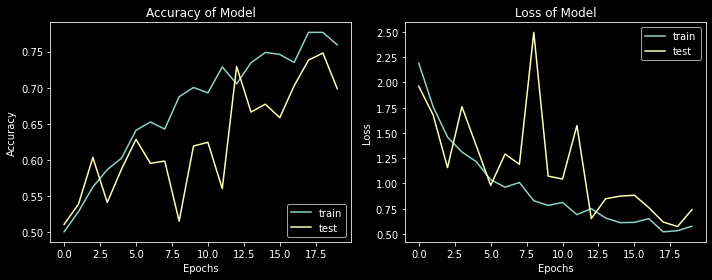

In [ ]:
plot_history(history)

#### Lets recreate model and add more dense layers

In [ ]:
model = Sequential()

In [ ]:
## embedding layer
emb_layer = Embedding(
    input_dim=SIZE, ## total number of input sequences
    output_dim=100, ## size of the output
    weights=[embeddings_matrix],  ## gets the weights from the emb matrix
    input_length=pad_length,  ## the length of the input sequence
    trainable=False  ## make this untrainable so weights remians fixed 
)

In [ ]:
model.add(emb_layer)
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
## compile
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
## train
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.25
)

Epoch 1/20
220/220 [==============================] - 2s 7ms/step - loss: 0.6953 - accuracy: 0.5083 - val_loss: 0.6952 - val_accuracy: 0.5073
Epoch 2/20
220/220 [==============================] - 1s 7ms/step - loss: 0.6945 - accuracy: 0.5085 - val_loss: 0.6946 - val_accuracy: 0.5082
Epoch 3/20
220/220 [==============================] - 1s 7ms/step - loss: 0.6941 - accuracy: 0.5084 - val_loss: 0.6941 - val_accuracy: 0.5090
Epoch 4/20
220/220 [==============================] - 1s 6ms/step - loss: 0.6939 - accuracy: 0.5090 - val_loss: 0.6940 - val_accuracy: 0.5096
Epoch 5/20
220/220 [==============================] - 1s 7ms/step - loss: 0.6938 - accuracy: 0.5089 - val_loss: 0.6939 - val_accuracy: 0.5105
Epoch 6/20
220/220 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.5091 - val_loss: 0.6937 - val_accuracy: 0.5105
Epoch 7/20
220/220 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5089 - val_loss: 0.6936 - val_accuracy: 0.5106
Epoch 

#### **Lets try a Convolutional model**

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPool1D

In [ ]:
model = Sequential()

In [ ]:
## embedding layer
emb_layer = Embedding(
    input_dim=SIZE, ## total number of input sequences
    output_dim=100, ## size of the output
    weights=[embeddings_matrix],  ## gets the weights from the emb matrix
    input_length=pad_length,  ## the length of the input sequence
    trainable=False  ## make this untrainable so weights remians fixed 
)

In [ ]:
model.add(emb_layer)

model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(GlobalMaxPool1D())

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 100)          9006600   
_________________________________________________________________
conv1d (Conv1D)              (None, 145, 64)           38464     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 9,045,129
Trainable params: 38,529
Non-trainable params: 9,006,600
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.25
)

Epoch 1/20
220/220 [==============================] - 2s 7ms/step - loss: 0.6838 - accuracy: 0.5530 - val_loss: 0.6556 - val_accuracy: 0.6224
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 0.6383 - accuracy: 0.6467 - val_loss: 0.6207 - val_accuracy: 0.6753
Epoch 3/20
220/220 [==============================] - 1s 6ms/step - loss: 0.6069 - accuracy: 0.6859 - val_loss: 0.5989 - val_accuracy: 0.6939
Epoch 4/20
220/220 [==============================] - 1s 6ms/step - loss: 0.5760 - accuracy: 0.7197 - val_loss: 0.5659 - val_accuracy: 0.7187
Epoch 5/20
220/220 [==============================] - 1s 6ms/step - loss: 0.5462 - accuracy: 0.7434 - val_loss: 0.5319 - val_accuracy: 0.7539
Epoch 6/20
220/220 [==============================] - 1s 6ms/step - loss: 0.5158 - accuracy: 0.7646 - val_loss: 0.5114 - val_accuracy: 0.7629
Epoch 7/20
220/220 [==============================] - 1s 6ms/step - loss: 0.4874 - accuracy: 0.7817 - val_loss: 0.4841 - val_accuracy: 0.7797
Epoch 

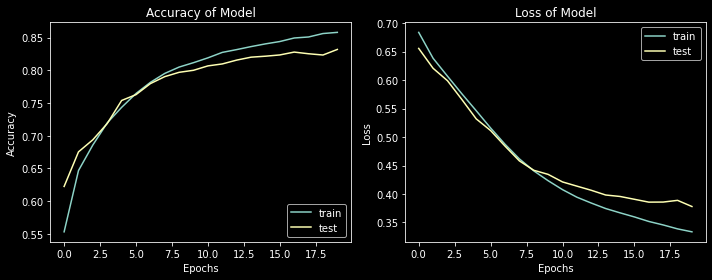

In [ ]:
plot_history(history)

In [ ]:
score = model.evaluate(x_test, y_test, return_dict=True)
print(score)

391/391 [==============================] - 1s 3ms/step - loss: 0.3888 - accuracy: 0.8286
{'loss': 0.38881954550743103, 'accuracy': 0.8285599946975708}


In [ ]:
## train for another 20 epochs

history2 = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.25
)

Epoch 1/20
220/220 [==============================] - 2s 7ms/step - loss: 0.3291 - accuracy: 0.8618 - val_loss: 0.3769 - val_accuracy: 0.8317
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 0.3228 - accuracy: 0.8639 - val_loss: 0.3752 - val_accuracy: 0.8331
Epoch 3/20
220/220 [==============================] - 1s 6ms/step - loss: 0.3175 - accuracy: 0.8663 - val_loss: 0.3747 - val_accuracy: 0.8319
Epoch 4/20
220/220 [==============================] - 1s 6ms/step - loss: 0.3130 - accuracy: 0.8681 - val_loss: 0.3722 - val_accuracy: 0.8343
Epoch 5/20
220/220 [==============================] - 1s 6ms/step - loss: 0.3084 - accuracy: 0.8700 - val_loss: 0.3936 - val_accuracy: 0.8194
Epoch 6/20
220/220 [==============================] - 1s 6ms/step - loss: 0.3035 - accuracy: 0.8733 - val_loss: 0.3697 - val_accuracy: 0.8332
Epoch 7/20
220/220 [==============================] - 1s 6ms/step - loss: 0.2998 - accuracy: 0.8759 - val_loss: 0.3727 - val_accuracy: 0.8362
Epoch 

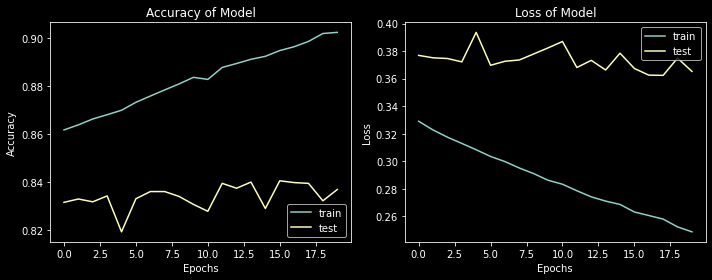

In [ ]:
plot_history(history2)

#### **Now with the RNNs**

In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
model = Sequential()

In [ ]:
## embedding layer
emb_layer = Embedding(
    input_dim=SIZE, ## total number of input sequences
    output_dim=100, ## size of the output
    weights=[embeddings_matrix],  ## gets the weights from the emb matrix
    input_length=pad_length,  ## the length of the input sequence
    trainable=False  ## make this untrainable so weights remians fixed 
)

In [ ]:
model.add(emb_layer)
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.25
)

Epoch 1/20
220/220 [==============================] - 21s 96ms/step - loss: 0.7143 - accuracy: 0.5014 - val_loss: 0.7023 - val_accuracy: 0.5221
Epoch 2/20
220/220 [==============================] - 22s 98ms/step - loss: 0.6978 - accuracy: 0.5269 - val_loss: 0.6922 - val_accuracy: 0.5410
Epoch 3/20
220/220 [==============================] - 21s 97ms/step - loss: 0.6885 - accuracy: 0.5486 - val_loss: 0.6909 - val_accuracy: 0.5442
Epoch 4/20
220/220 [==============================] - 21s 96ms/step - loss: 0.6807 - accuracy: 0.5617 - val_loss: 0.6934 - val_accuracy: 0.5631
Epoch 5/20
220/220 [==============================] - 21s 95ms/step - loss: 0.6884 - accuracy: 0.5509 - val_loss: 0.6902 - val_accuracy: 0.5206
Epoch 6/20
220/220 [==============================] - 21s 96ms/step - loss: 0.6856 - accuracy: 0.5417 - val_loss: 0.6847 - val_accuracy: 0.5467
Epoch 7/20
220/220 [==============================] - 21s 95ms/step - loss: 0.6816 - accuracy: 0.5515 - val_loss: 0.6822 - val_accuracy:

#### **Lets see how LSTMs perform**

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()

In [ ]:
## embedding layer
emb_layer = Embedding(
    input_dim=SIZE, ## total number of input sequences
    output_dim=100, ## size of the output
    weights=[embeddings_matrix],  ## gets the weights from the emb matrix
    input_length=pad_length,  ## the length of the input sequence
    trainable=False  ## make this untrainable so weights remians fixed 
)

In [ ]:
model.add(emb_layer)
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.25
)

Epoch 1/20
220/220 [==============================] - 4s 18ms/step - loss: 0.6912 - accuracy: 0.5231 - val_loss: 0.6898 - val_accuracy: 0.5217
Epoch 2/20
220/220 [==============================] - 3s 16ms/step - loss: 0.6866 - accuracy: 0.5515 - val_loss: 0.6859 - val_accuracy: 0.5429
Epoch 3/20
220/220 [==============================] - 3s 16ms/step - loss: 0.6824 - accuracy: 0.5671 - val_loss: 0.6810 - val_accuracy: 0.5726
Epoch 4/20
220/220 [==============================] - 4s 17ms/step - loss: 0.6779 - accuracy: 0.5806 - val_loss: 0.6762 - val_accuracy: 0.5815
Epoch 5/20
220/220 [==============================] - 3s 16ms/step - loss: 0.6720 - accuracy: 0.5956 - val_loss: 0.6693 - val_accuracy: 0.5993
Epoch 6/20
220/220 [==============================] - 3s 16ms/step - loss: 0.6604 - accuracy: 0.6187 - val_loss: 0.6492 - val_accuracy: 0.6437
Epoch 7/20
220/220 [==============================] - 3s 16ms/step - loss: 0.6435 - accuracy: 0.6371 - val_loss: 0.6248 - val_accuracy: 0.6623

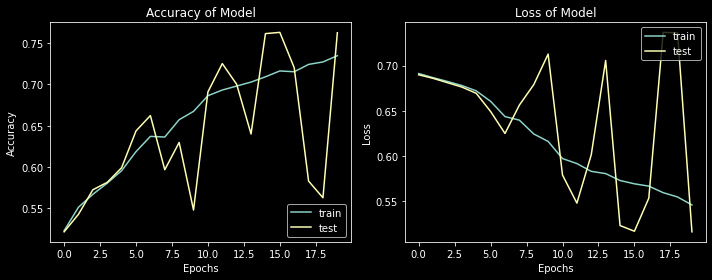

In [ ]:
plot_history(history)

In [ ]:
history2 = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=40,
    validation_split=0.25
)

Epoch 1/40
220/220 [==============================] - 4s 16ms/step - loss: 0.5379 - accuracy: 0.7426 - val_loss: 0.4914 - val_accuracy: 0.7783
Epoch 2/40
220/220 [==============================] - 3s 16ms/step - loss: 0.5413 - accuracy: 0.7399 - val_loss: 0.5254 - val_accuracy: 0.7450
Epoch 3/40
220/220 [==============================] - 4s 16ms/step - loss: 0.5363 - accuracy: 0.7429 - val_loss: 0.4861 - val_accuracy: 0.7803
Epoch 4/40
220/220 [==============================] - 4s 16ms/step - loss: 0.5320 - accuracy: 0.7446 - val_loss: 0.5410 - val_accuracy: 0.7298
Epoch 5/40
220/220 [==============================] - 4s 16ms/step - loss: 0.5271 - accuracy: 0.7502 - val_loss: 0.5567 - val_accuracy: 0.7250
Epoch 6/40
220/220 [==============================] - 4s 16ms/step - loss: 0.5209 - accuracy: 0.7523 - val_loss: 0.4785 - val_accuracy: 0.7836
Epoch 7/40
220/220 [==============================] - 3s 16ms/step - loss: 0.5201 - accuracy: 0.7523 - val_loss: 0.5686 - val_accuracy: 0.7006

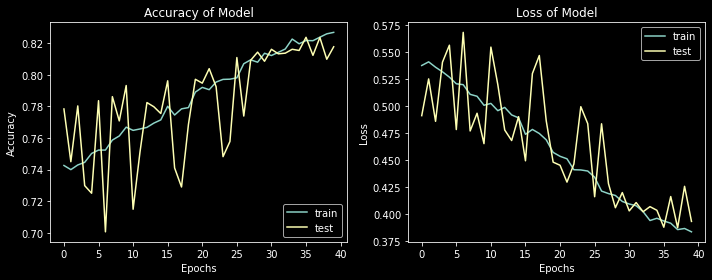

In [ ]:
plot_history(history2)

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
optimizer = SGD(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history3 = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=40,
    validation_split=0.25
)

Epoch 1/40
220/220 [==============================] - 4s 17ms/step - loss: 0.3714 - accuracy: 0.8340 - val_loss: 0.3795 - val_accuracy: 0.8286
Epoch 2/40
220/220 [==============================] - 3s 16ms/step - loss: 0.3705 - accuracy: 0.8345 - val_loss: 0.3792 - val_accuracy: 0.8298
Epoch 3/40
220/220 [==============================] - 3s 16ms/step - loss: 0.3703 - accuracy: 0.8346 - val_loss: 0.3798 - val_accuracy: 0.8310
Epoch 4/40
220/220 [==============================] - 3s 16ms/step - loss: 0.3701 - accuracy: 0.8349 - val_loss: 0.3788 - val_accuracy: 0.8294
Epoch 5/40
220/220 [==============================] - 3s 16ms/step - loss: 0.3699 - accuracy: 0.8353 - val_loss: 0.3786 - val_accuracy: 0.8299
Epoch 6/40
220/220 [==============================] - 3s 16ms/step - loss: 0.3696 - accuracy: 0.8356 - val_loss: 0.3783 - val_accuracy: 0.8291
Epoch 7/40
220/220 [==============================] - 3s 16ms/step - loss: 0.3693 - accuracy: 0.8349 - val_loss: 0.3784 - val_accuracy: 0.8300

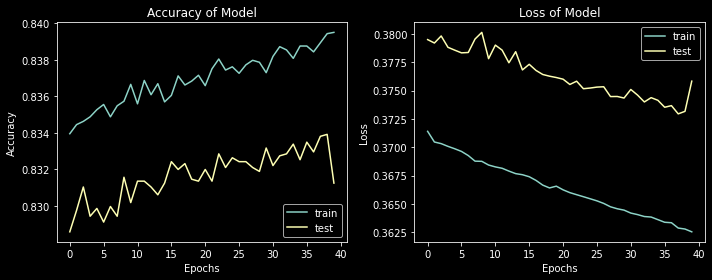

In [ ]:
plot_history(history3)

#### Lets increase the number of LSTM cells and try again

In [ ]:
model = Sequential()

In [ ]:
## embedding layer
emb_layer = Embedding(
    input_dim=SIZE, ## total number of input sequences
    output_dim=100, ## size of the output
    weights=[embeddings_matrix],  ## gets the weights from the emb matrix
    input_length=pad_length,  ## the length of the input sequence
    trainable=False  ## make this untrainable so weights remians fixed 
)

In [ ]:
model.add(emb_layer)
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = SGD(0.001)

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.25
)

Epoch 1/20
220/220 [==============================] - 6s 29ms/step - loss: 0.6927 - accuracy: 0.5079 - val_loss: 0.6898 - val_accuracy: 0.5501
Epoch 2/20
220/220 [==============================] - 6s 27ms/step - loss: 0.6878 - accuracy: 0.5455 - val_loss: 0.6855 - val_accuracy: 0.5632
Epoch 3/20
220/220 [==============================] - 6s 28ms/step - loss: 0.6834 - accuracy: 0.5672 - val_loss: 0.6817 - val_accuracy: 0.5707
Epoch 4/20
220/220 [==============================] - 6s 28ms/step - loss: 0.6787 - accuracy: 0.5783 - val_loss: 0.6760 - val_accuracy: 0.5938
Epoch 5/20
220/220 [==============================] - 6s 27ms/step - loss: 0.6731 - accuracy: 0.5902 - val_loss: 0.6694 - val_accuracy: 0.6007
Epoch 6/20
220/220 [==============================] - 6s 27ms/step - loss: 0.6628 - accuracy: 0.6100 - val_loss: 0.6558 - val_accuracy: 0.6308
Epoch 7/20
220/220 [==============================] - 6s 27ms/step - loss: 0.6431 - accuracy: 0.6379 - val_loss: 0.7016 - val_accuracy: 0.5748

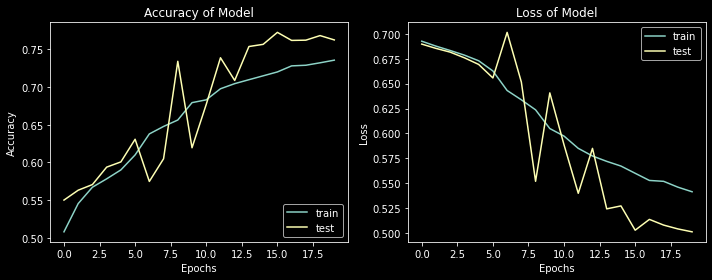

In [ ]:
plot_history(history)

In [ ]:
optimizer = SGD(0.0001)

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history2 = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.25
)

Epoch 1/20
220/220 [==============================] - 6s 29ms/step - loss: 0.5374 - accuracy: 0.7381 - val_loss: 0.5046 - val_accuracy: 0.7635
Epoch 2/20
220/220 [==============================] - 6s 27ms/step - loss: 0.5351 - accuracy: 0.7414 - val_loss: 0.7992 - val_accuracy: 0.5587
Epoch 3/20
220/220 [==============================] - 6s 27ms/step - loss: 0.5301 - accuracy: 0.7428 - val_loss: 0.4963 - val_accuracy: 0.7743
Epoch 4/20
220/220 [==============================] - 6s 27ms/step - loss: 0.5314 - accuracy: 0.7427 - val_loss: 0.4954 - val_accuracy: 0.7769
Epoch 5/20
220/220 [==============================] - 6s 27ms/step - loss: 0.5210 - accuracy: 0.7476 - val_loss: 0.4847 - val_accuracy: 0.7776
Epoch 6/20
220/220 [==============================] - 6s 27ms/step - loss: 0.5187 - accuracy: 0.7527 - val_loss: 0.4709 - val_accuracy: 0.7890
Epoch 7/20
220/220 [==============================] - 6s 27ms/step - loss: 0.5152 - accuracy: 0.7537 - val_loss: 0.4972 - val_accuracy: 0.7707

In [ ]:
history3 = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=50,
    validation_split=0.25
)

Epoch 1/50
220/220 [==============================] - 6s 27ms/step - loss: 0.4773 - accuracy: 0.7776 - val_loss: 0.4808 - val_accuracy: 0.7803
Epoch 2/50
220/220 [==============================] - 6s 27ms/step - loss: 0.4701 - accuracy: 0.7790 - val_loss: 0.4759 - val_accuracy: 0.7837
Epoch 3/50
220/220 [==============================] - 6s 27ms/step - loss: 0.4750 - accuracy: 0.7776 - val_loss: 0.4409 - val_accuracy: 0.8014
Epoch 4/50
220/220 [==============================] - 6s 27ms/step - loss: 0.4667 - accuracy: 0.7829 - val_loss: 0.4370 - val_accuracy: 0.8035
Epoch 5/50
220/220 [==============================] - 6s 28ms/step - loss: 0.4596 - accuracy: 0.7839 - val_loss: 0.4994 - val_accuracy: 0.7516
Epoch 6/50
220/220 [==============================] - 6s 27ms/step - loss: 0.4608 - accuracy: 0.7835 - val_loss: 0.4597 - val_accuracy: 0.7858
Epoch 7/50
220/220 [==============================] - 6s 27ms/step - loss: 0.4632 - accuracy: 0.7858 - val_loss: 0.4387 - val_accuracy: 0.8027

In [ ]:
optimizer = SGD(0.00005)

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history4 = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=50,
    validation_split=0.25
)

Epoch 1/50
220/220 [==============================] - 6s 28ms/step - loss: 0.3638 - accuracy: 0.8387 - val_loss: 0.3663 - val_accuracy: 0.8353
Epoch 2/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3597 - accuracy: 0.8406 - val_loss: 0.3689 - val_accuracy: 0.8369
Epoch 3/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3582 - accuracy: 0.8414 - val_loss: 0.3639 - val_accuracy: 0.8398
Epoch 4/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3585 - accuracy: 0.8430 - val_loss: 0.3646 - val_accuracy: 0.8391
Epoch 5/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3518 - accuracy: 0.8448 - val_loss: 0.3602 - val_accuracy: 0.8394
Epoch 6/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3542 - accuracy: 0.8426 - val_loss: 0.3801 - val_accuracy: 0.8281
Epoch 7/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3534 - accuracy: 0.8436 - val_loss: 0.3665 - val_accuracy: 0.8347

In [ ]:
optimizer = SGD(0.00001)

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history5 = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=50,
    validation_split=0.25
)

Epoch 1/50
220/220 [==============================] - 6s 28ms/step - loss: 0.3153 - accuracy: 0.8653 - val_loss: 0.3523 - val_accuracy: 0.8448
Epoch 2/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3143 - accuracy: 0.8642 - val_loss: 0.3641 - val_accuracy: 0.8330
Epoch 3/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3190 - accuracy: 0.8628 - val_loss: 0.3520 - val_accuracy: 0.8469
Epoch 4/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3145 - accuracy: 0.8656 - val_loss: 0.3553 - val_accuracy: 0.8502
Epoch 5/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3143 - accuracy: 0.8631 - val_loss: 0.3556 - val_accuracy: 0.8471
Epoch 6/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3133 - accuracy: 0.8646 - val_loss: 0.3551 - val_accuracy: 0.8493
Epoch 7/50
220/220 [==============================] - 6s 27ms/step - loss: 0.3145 - accuracy: 0.8645 - val_loss: 0.3592 - val_accuracy: 0.8422

In [ ]:
score = model.evaluate(x_test, y_test, return_dict=True)
print(score)

391/391 [==============================] - 2s 6ms/step - loss: 0.3804 - accuracy: 0.8423
{'loss': 0.38041093945503235, 'accuracy': 0.8423200249671936}


### **Exercises**
- Exercise 1 - Try different architectures, learning-rates, optimizers with CNN, SimpleRNNs, and LSTM and see how you can increase the accuracy further. 
- Exercise 2 - Try the same experiments with GRU layers 